# Data Exploration
we can first start by examining our existing data somewhat. For that, we first load our csv file into pandas. We start by installing and loading dependencies

In [5]:
%pip install tensorflow
%pip install distutils
%pip install pandas
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for distutils
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to 

In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf

print(tf.__version__)

2025-01-31 00:58:14.063603: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 00:58:14.066663: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 00:58:14.075946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738281494.091164  387561 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738281494.095810  387561 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 00:58:14.112134: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

2.18.0


In [8]:
import src.model_training as model_t

In [9]:
data = pd.read_csv("data/data_impure.csv", delimiter="|")
data

,journal_num,text,class
0,92,A Bill for the more effectual preventing Cland...,Reading of a Bill
1,92,PETITION of several Persons whose names are th...,Petition for leave to bring bill
2,92,Sir John Beckett presented a Bill for inclosin...,Reading of a Bill
3,92,Lord Russell presented a Bill for inclosing an...,Reading of a Bill
4,92,"A Petition of Hand-loom Weavers of Longtown, p...",Reading of a Petition
...,...,...,...
195,146,"Resolved, That if \n it \n shall appear that a...",Resolution
196,146,"Resolved, That if it \n shall appear that any ...",Resolution
197,146,"Resolved, That an humble Address be pre- Qwen'...",Resolution
198,146,"Ordered, That all Members who are returned \n ...",Order


As you can see, we have 200 columns of data, consisting mostly of a "text" field and a "class". Lets take a closer look at class.

In [10]:
class_names = data["class"].unique()
print(
    class_names, 
    len(class_names)
    )

['Reading of a Bill' 'Petition for leave to bring bill'
 'Reading of a Petition' 'Reading of a Report'
 'Motion for leave to bring Bill' 'Order' 'Motion withdrawn'
 'Adjournment of Debate' 'Appointment of Committees' 'Resolution'
 'Petition' 'Division of the House' 'Message from Royalty or Lords'] 13


As you can see, our current "class" field contains 13 different class names. We saved their names into the Array `class_names`.

# Model creation

accordingly, we can start building our Neural Net Model. If you paid attention earelier, we loaded a helper library.

First, we need to prepare our data for training the Neural Net. For that, we split our data into a validation and training data set. To facilitate this, tensorflow recommends implementing your data in a folder structure like:
```
- data/
|- class1/
 |- text.txt
|- class2/
...
```

In [11]:
# create folderstructure
for class_name in class_names:
    class_dir = Path(f"data/dataset/{class_name}")
    class_dir.mkdir(parents=True, exist_ok=True)

# create data
for index, row in data.iterrows():
    print(index, row)
    with open(f"data/dataset/{row["class"]}/{index}.txt", "w") as f:
        f.write(row[1])

    

0 journal_num                                                   92
text           A Bill for the more effectual preventing Cland...
class                                          Reading of a Bill
Name: 0, dtype: object
1 journal_num                                                   92
text           PETITION of several Persons whose names are th...
class                           Petition for leave to bring bill
Name: 1, dtype: object
2 journal_num                                                   92
text           Sir John Beckett presented a Bill for inclosin...
class                                          Reading of a Bill
Name: 2, dtype: object
3 journal_num                                                   92
text           Lord Russell presented a Bill for inclosing an...
class                                          Reading of a Bill
Name: 3, dtype: object
4 journal_num                                                   92
text           A Petition of Hand-loom Weavers of Lon

/tmp/ipykernel_387561/1668619078.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.write(row[1])


next, we load this data into a usable dataset by using `tf.keras.utils.text_dataset_from_directory`

In [12]:
seed = 101
tf_train_data = tf.keras.utils.text_dataset_from_directory("data/dataset", batch_size=32, validation_split=0.2, subset='training', seed=seed)
tf_val_data = tf.keras.utils.text_dataset_from_directory("data/dataset", batch_size=32, validation_split=0.2, subset='validation', seed=seed)

Found 200 files belonging to 13 classes.
Using 160 files for training.
Found 200 files belonging to 13 classes.
Using 40 files for validation.


2025-01-31 00:58:15.606986: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2025-01-31 00:58:15.607007: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: desktop
2025-01-31 00:58:15.607013: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: desktop
2025-01-31 00:58:15.607069: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 570.86.16
2025-01-31 00:58:15.607086: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 565.77.0
2025-01-31 00:58:15.607091: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:262] kernel version 565.77.0 does not match DSO version 570.86.16 -- cannot find working devices i

Now, we can take a look at our generated data

In [13]:
for text_batch, label_batch in tf_train_data.take(1):
  for i in range(10):
    print("Text: ", text_batch.numpy()[i])
    print("Label:", label_batch.numpy()[i])

Text:  b'The House was moved, That the Act 5 and 6 Will. 4, c.76, to provide for the Regulation of Municipal Corporations in England and Wales, might be read; and the same being read; Ordered, That leave be given to bring in a Bill to amend the said Act: And that Mr. Attorney General and Mr. Solicitor General do prepare, and bring it in.'
Label: 4
Text:  b'Resolved, That no Peer of the Realm, except \\n such Peers of Ireland as shall, for the time being, \\n be actually elected, and shall not have declined \\n to serve, for any county, city, or borough of \\n Great Britain, hath any right to give his vote \\n in the Election of any Member to serve in \\n Parliament. \\n Complaint made by Mr. MacVeagh, Member Privilege \\n for the South Down Division of County Down, (Voting of a \\n that the Earl of Roden, a Peer of the Realm, Parliamentary \\n at \\n had voted in the Election of a Member to the Election.) \\n House of Commons to serve for the South Down \\n Division of County Down. \\n

2025-01-31 00:58:15.675879: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
for i, label in enumerate(tf_train_data.class_names):
  print("Label", i, "corresponds to", label)

Label 0 corresponds to Adjournment of Debate
Label 1 corresponds to Appointment of Committees
Label 2 corresponds to Division of the House
Label 3 corresponds to Message from Royalty or Lords
Label 4 corresponds to Motion for leave to bring Bill
Label 5 corresponds to Motion withdrawn
Label 6 corresponds to Order
Label 7 corresponds to Petition
Label 8 corresponds to Petition for leave to bring bill
Label 9 corresponds to Reading of a Bill
Label 10 corresponds to Reading of a Petition
Label 11 corresponds to Reading of a Report
Label 12 corresponds to Resolution


Next, we can start the vectorisation of our training data. For this, we again get a vectorisation layer from our helber library, and then train it on our data!

In [15]:
vectorize_layer = model_t.create_vec_layer()

# Make a text-only dataset (without labels), then call adapt
train_text = tf_train_data.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

2025-01-31 00:58:15.765702: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


We can now test our vectorisation

In [16]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

text_batch, label_batch = next(iter(tf_train_data))
first_review, first_label = text_batch[0], label_batch[0]
print("Text", first_review)
print("Class", tf_train_data.class_names[first_label])
print("Vectorized Text", vectorize_text(first_review, first_label))

Text tf.Tensor(b'Ordered, That the said Address be presented \\n to Her Majesty by such Members of this House \\n as are of Her Majesty\'s Most honourable Privy \\n Council. \\n And then the House, having continued to sit \\n till a quarter of an hour after Ten of the \\n clock, adjourned till To-morrow. \\n Wednesday, 26th November, 1890. \\n THE House met at Twelve of the clock. \\n r \\n HE House being met, the Clerk at the Mr. Speaker\'s \\n Table \\n informed \\n the \\n House, \\n \'[hat \\n Mr. Absence. \\n Speaker was again unavoidably prevented from \\n taking the Chair of the House this day. \\n Whereupon Mr. Courtney, the Chairman of Prayers. \\n Ways and Means, proceeded to the Table ; \\n and, \\n after Prayers, took the Chair, as Deputy Speaker, \\n pursuant to the Standing Order. \\n Several Public Petitions were presented, and Public \\n read ; \\n and ordered to lie upon the Table. \\n Petitions., \\n Vide First \\n Report. \\n Ordered, That leave be given to brillg in

In [17]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 113 ---> ",vectorize_layer.get_vocabulary()[113])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  gow
 113 --->  also
Vocabulary size: 2713


# Training the Model

Now we can convert our data using the vectorisation and finally start creating and training our model

In [18]:
train_data = tf_train_data.map(vectorize_text)
val_data = tf_val_data.map(vectorize_text)
test_data = tf_train_data.map(vectorize_text)

In [19]:
model_init = model_t.init_model(output_amount=len(class_names))

model_init.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model, history = model_t.train_model(model_init, train_data, val_data, epochs=12)

model.summary()

Epoch 1/12


/home/sebastianfath/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2171 - loss: 2.5339 - val_accuracy: 0.5250 - val_loss: 2.4050
Epoch 2/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4339 - loss: 2.4321 - val_accuracy: 0.5250 - val_loss: 2.2706
Epoch 3/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4535 - loss: 2.3238 - val_accuracy: 0.5250 - val_loss: 2.1512
Epoch 4/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4209 - loss: 2.2449 - val_accuracy: 0.5250 - val_loss: 2.0520
Epoch 5/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4621 - loss: 2.1747 - val_accuracy: 0.5250 - val_loss: 1.9731
Epoch 6/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4651 - loss: 2.0900 - val_accuracy: 0.5250 - val_loss: 1.9074
Epoch 7/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4753 - loss: 2.0503 - val_accuracy: 0.5250 - val_loss: 1.8522
Epoch 8/12
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4569 - loss: 2.0098 - val_accuracy: 0.5250 - val_loss: 1.8101
Epoch 9/12


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 16)       │     1,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 13)             │           221 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,800,665 (18.31 MB)

 Trainable params: 1,600,221 (6.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,200,444 (12.21 MB)

# Analyse and Eval Training and Model

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

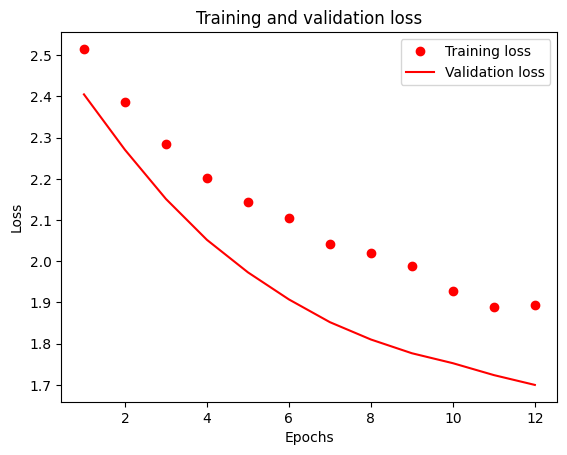

In [22]:


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

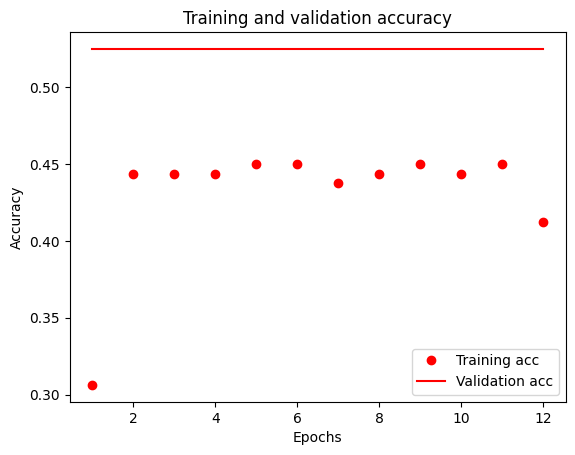

In [23]:
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

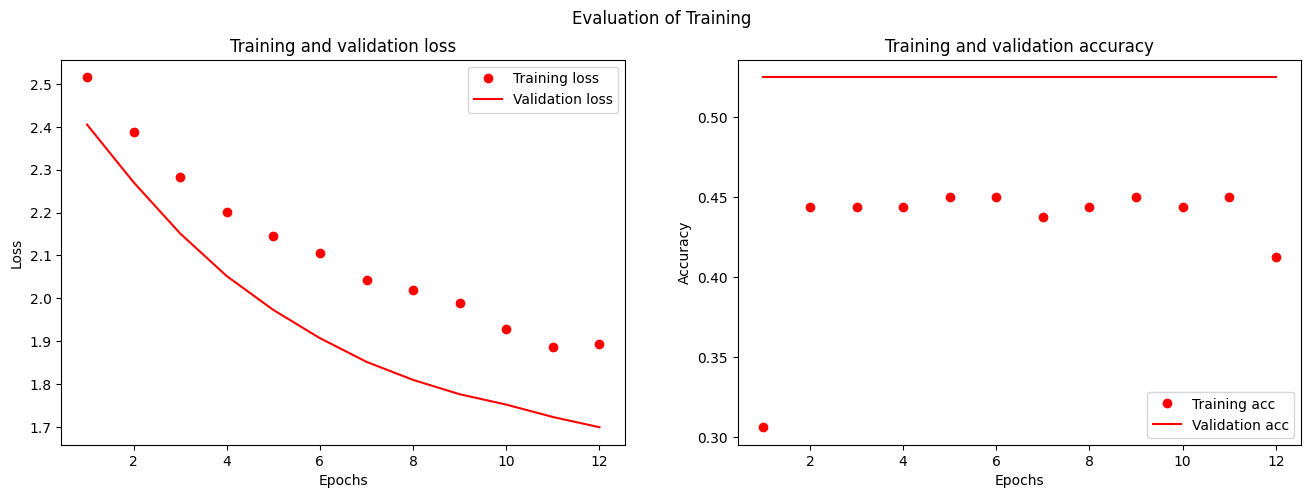

In [46]:
# better design
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 5)
fig.suptitle("Evaluation of Training")

axs[0].plot(epochs, loss, 'ro', label='Training loss')
axs[0].plot(epochs, val_loss, 'r', label='Validation loss')
axs[0].set_title('Training and validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(epochs, acc, 'ro', label='Training acc')
axs[1].plot(epochs, val_acc, 'r', label='Validation acc')
axs[1].set_title('Training and validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='lower right')


# Export Model and explore

In [24]:
final_model = model_t.add_vec_to_model(model, vectorize_layer)

examples = tf.constant([
    "Ordered, That no Bills, other than Government Bills, be introduced in anticipation of the Ballot, and that all Members who desire to ballot, whether for Bills or for Motions for Wednesdays the 30th November, 7th, 14th, and 21st December, do hand in their names at the Table during the Sitting of the House on Tuesday 22nd November or Wednesday 23rd November; and that a copy of the notice of such Bill or Motion be handed in at the latest during the Sitting of the House on Thursday the 24th November. ",
    "Colonel Sir Walter Smiles, supported by Colonel Sir Kenyan, Vaughan-Morgan, Captain Bill Elliston, Mr. Rosbotham, Mr. Richard Russell, Sir Walter Greaves-Lord, Miss Horsbrugh, Mr. Buchan, Mr. Alexander Ramsay, and Mr. Cocks, presented a Bill to provide for the licensing of Dog-racing courses: And the same was ordered to be read a second time upon Friday next; and to be printed"
])

In [28]:
predictions = final_model.predict(examples)

for i, prediction in enumerate(predictions):
    print("Prediction", i)
    for i, p in enumerate(prediction):
        print("example is a", tf_train_data.class_names[i], "with a certainty of", p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction 0
example is a Adjournment of Debate with a certainty of 0.58867127
example is a Appointment of Committees with a certainty of 0.61020535
example is a Division of the House with a certainty of 0.5925432
example is a Message from Royalty or Lords with a certainty of 0.5630522
example is a Motion for leave to bring Bill with a certainty of 0.6602842
example is a Motion withdrawn with a certainty of 0.58830774
example is a Order with a certainty of 0.703263
example is a Petition with a certainty of 0.63716805
example is a Petition for leave to bring bill with a certainty of 0.5798513
example is a Reading of a Bill with a certainty of 0.5994152
example is a Reading of a Petition with a certainty of 0.5760221
example is a Reading of a Report with a certainty of 0.5934327
example is a Resolution with a certainty of 0.69993234
Prediction 1
example is a Adjournment of Debate with a certainty of 0.5866008
example is a Appointment of Committees wi

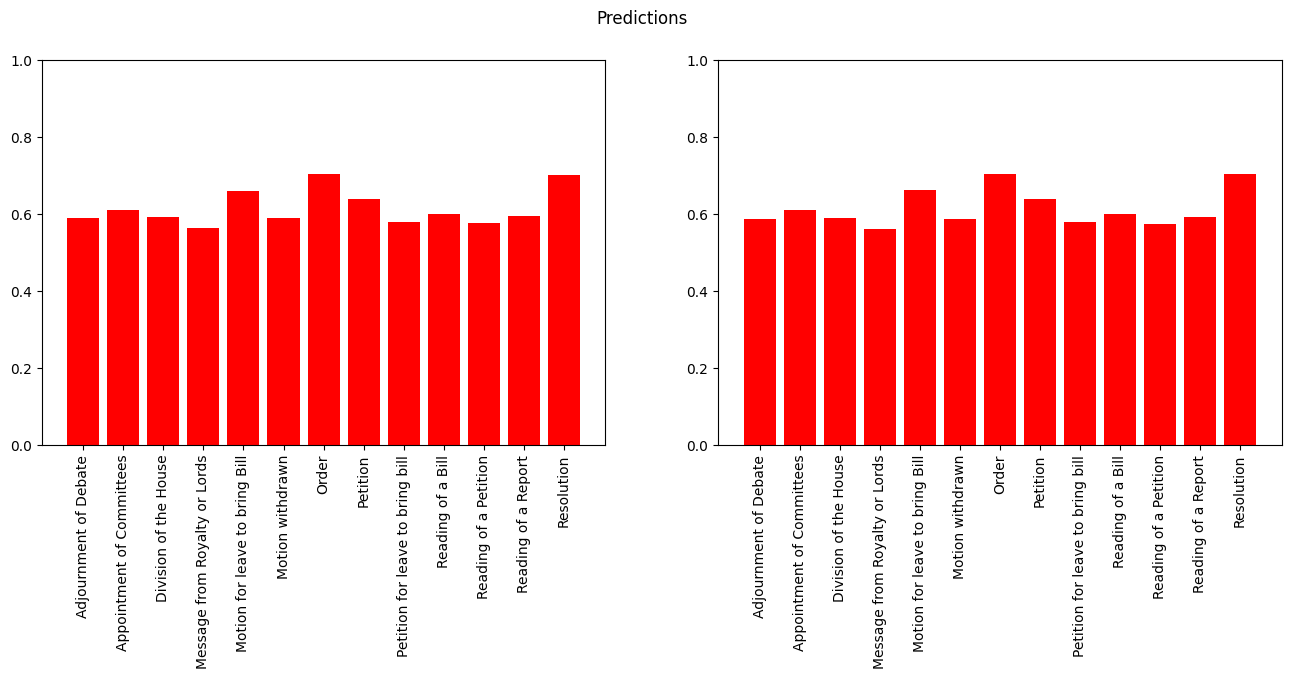

In [49]:
fig, axs = plt.subplots(1, len(predictions))
fig.set_size_inches(16, 5)
fig.suptitle("Predictions")
for index, prediction in enumerate(predictions):
    axs[index].bar(tf_train_data.class_names, prediction, color='red')
    axs[index].set(ylim=(0,1))
    axs[index].tick_params(axis='x', labelrotation=90)

In [50]:
# Test it with `raw_test_ds`, which yields raw strings
metrics = final_model.evaluate(tf_train_data, return_dict=True)
print(metrics)

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.5000 - loss: 2.3823

/home/sebastianfath/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4548 - loss: 2.3509  
{'accuracy': 0.4437499940395355, 'loss': 2.337174654006958}


In [51]:
# save model to disk as .keras

Path("out/").mkdir(parents=True, exist_ok=True)
model.save('out/parlamentary_actions_cat.keras')

In [52]:
# reload model snippet
new_model = tf.keras.models.load_model('out/parlamentary_actions_cat.keras')

# Show the model architecture
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 16)       │     1,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 13)             │           221 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,800,665 (18.31 MB)

 Trainable params: 1,600,221 (6.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,200,444 (12.21 MB)